In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

sys.path.append('src')
from constants import BASE_PATH, make_ibl_linear_model_path

In [2]:
base_path = BASE_PATH

In [55]:

def load_dfe_results(result_path):
    """Load DFE pickle files from result path."""
    with open(result_path / 'dfe_no_mask_pred.pkl', 'rb') as f:
        dfe_mae = pickle.load(f)
    with open(result_path / 'dfe_no_mask_from_record_to_heldout.pkl', 'rb') as f:
        dfe_baseline = pickle.load(f)
    return dfe_mae, dfe_baseline

def flatten_dfe(dfe_dict: dict, filter: bool = True) -> np.ndarray:
    sess_area_dfe = []
    for eid_ind in dfe_dict.keys():
        for area_ind in dfe_dict[eid_ind].keys():
            sess_area_dfe.append(dfe_dict[eid_ind][area_ind])
    dfe_all = np.concatenate(sess_area_dfe)
    dfe_all = dfe_all[abs(dfe_all) < 1e3]
    if filter:
        dfe_all = dfe_all[dfe_all > np.quantile(dfe_all, 0.01)]
    return dfe_all

def main(filter: bool = True):
    all_means = []
    all_sems = []
    all_xticks = []
    for reg in [True, False]:
        for consistency in [True, False]:
            for smooth in [True, False]:
                try:
                    path = base_path / 'eval' / make_ibl_linear_model_path(reg, consistency, smooth, 20)
                    
                    with open(path / 'dfe_no_mask_pred.pkl', 'rb') as f:
                        dfe_mae = pickle.load(f)
                    mae_stats = flatten_dfe(dfe_mae, filter=filter)
                    all_means.append(np.nanmean(mae_stats))
                    all_sems.append(np.nanstd(mae_stats) / np.sqrt(len(mae_stats)))
                    all_xticks.append(f"reg {int(reg)}\nconsistency {int(consistency)}\nsmooth {int(smooth)}")
                    print(f'reg {reg}, consistency {consistency}, smooth {smooth}: \t{np.nanmean(mae_stats):.4f} ± {np.nanstd(mae_stats) / np.sqrt(len(mae_stats)):.4f}')
                except FileNotFoundError:
                    pass
    return all_means, all_sems, all_xticks

reg True, consistency False, smooth True: 	0.0676 ± 0.0010
reg True, consistency False, smooth False: 	0.1479 ± 0.0012
reg False, consistency True, smooth True: 	0.0514 ± 0.0010
reg False, consistency True, smooth False: 	0.1178 ± 0.0030
reg False, consistency False, smooth True: 	0.0546 ± 0.0011
reg False, consistency False, smooth False: 	0.1201 ± 0.0036


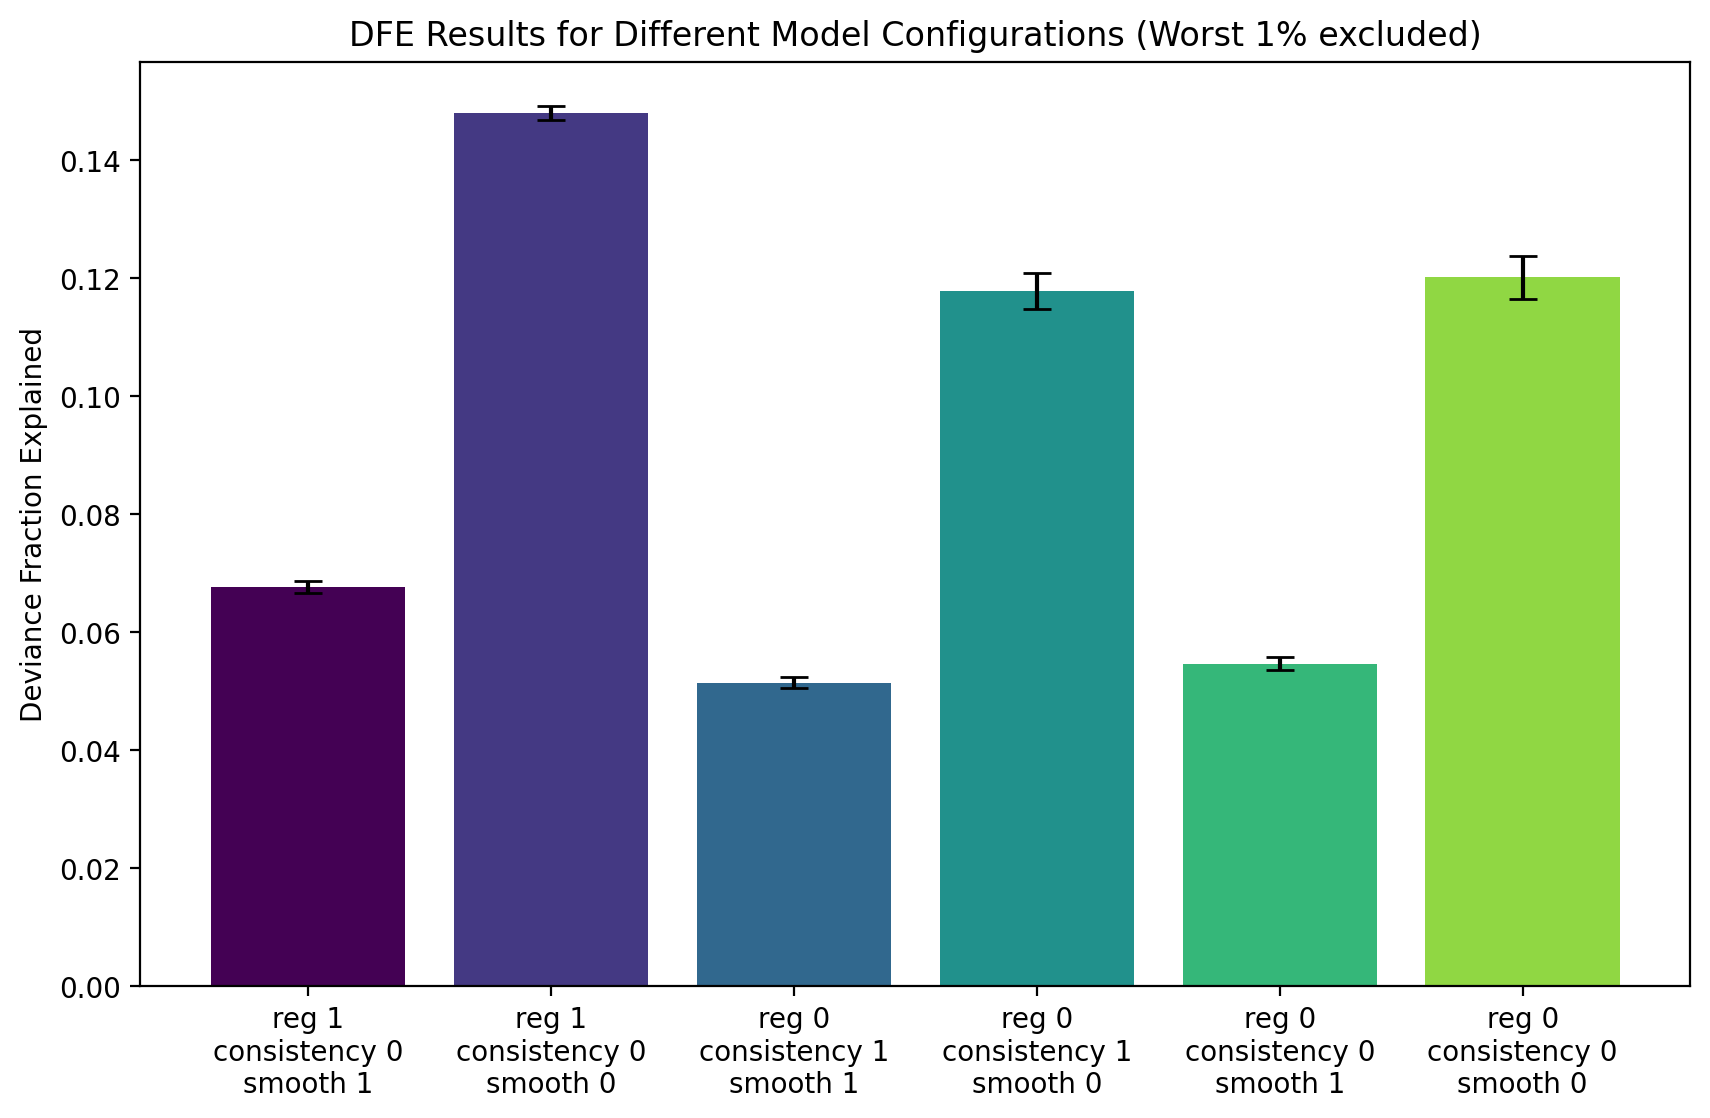

In [58]:
all_means, all_sems, all_xticks = main(filter=True)

plt.figure(figsize=(10, 6))
x = np.arange(len(all_means))
cmap = plt.cm.viridis
colors = [cmap(i / len(all_means)) for i in range(len(all_means))]
plt.bar(x, all_means, yerr=all_sems, capsize=5, color=colors)
plt.xticks(x, all_xticks)
plt.ylabel("Deviance Fraction Explained")
plt.title("DFE Results for Different Model Configurations (Worst 1% excluded)")
plt.show()

reg True, consistency False, smooth True: 	-0.2994 ± 0.0923
reg True, consistency False, smooth False: 	0.0664 ± 0.0252
reg False, consistency True, smooth True: 	-0.1994 ± 0.0654
reg False, consistency True, smooth False: 	-0.3033 ± 0.0791
reg False, consistency False, smooth True: 	-0.3345 ± 0.0748
reg False, consistency False, smooth False: 	-0.2957 ± 0.0809


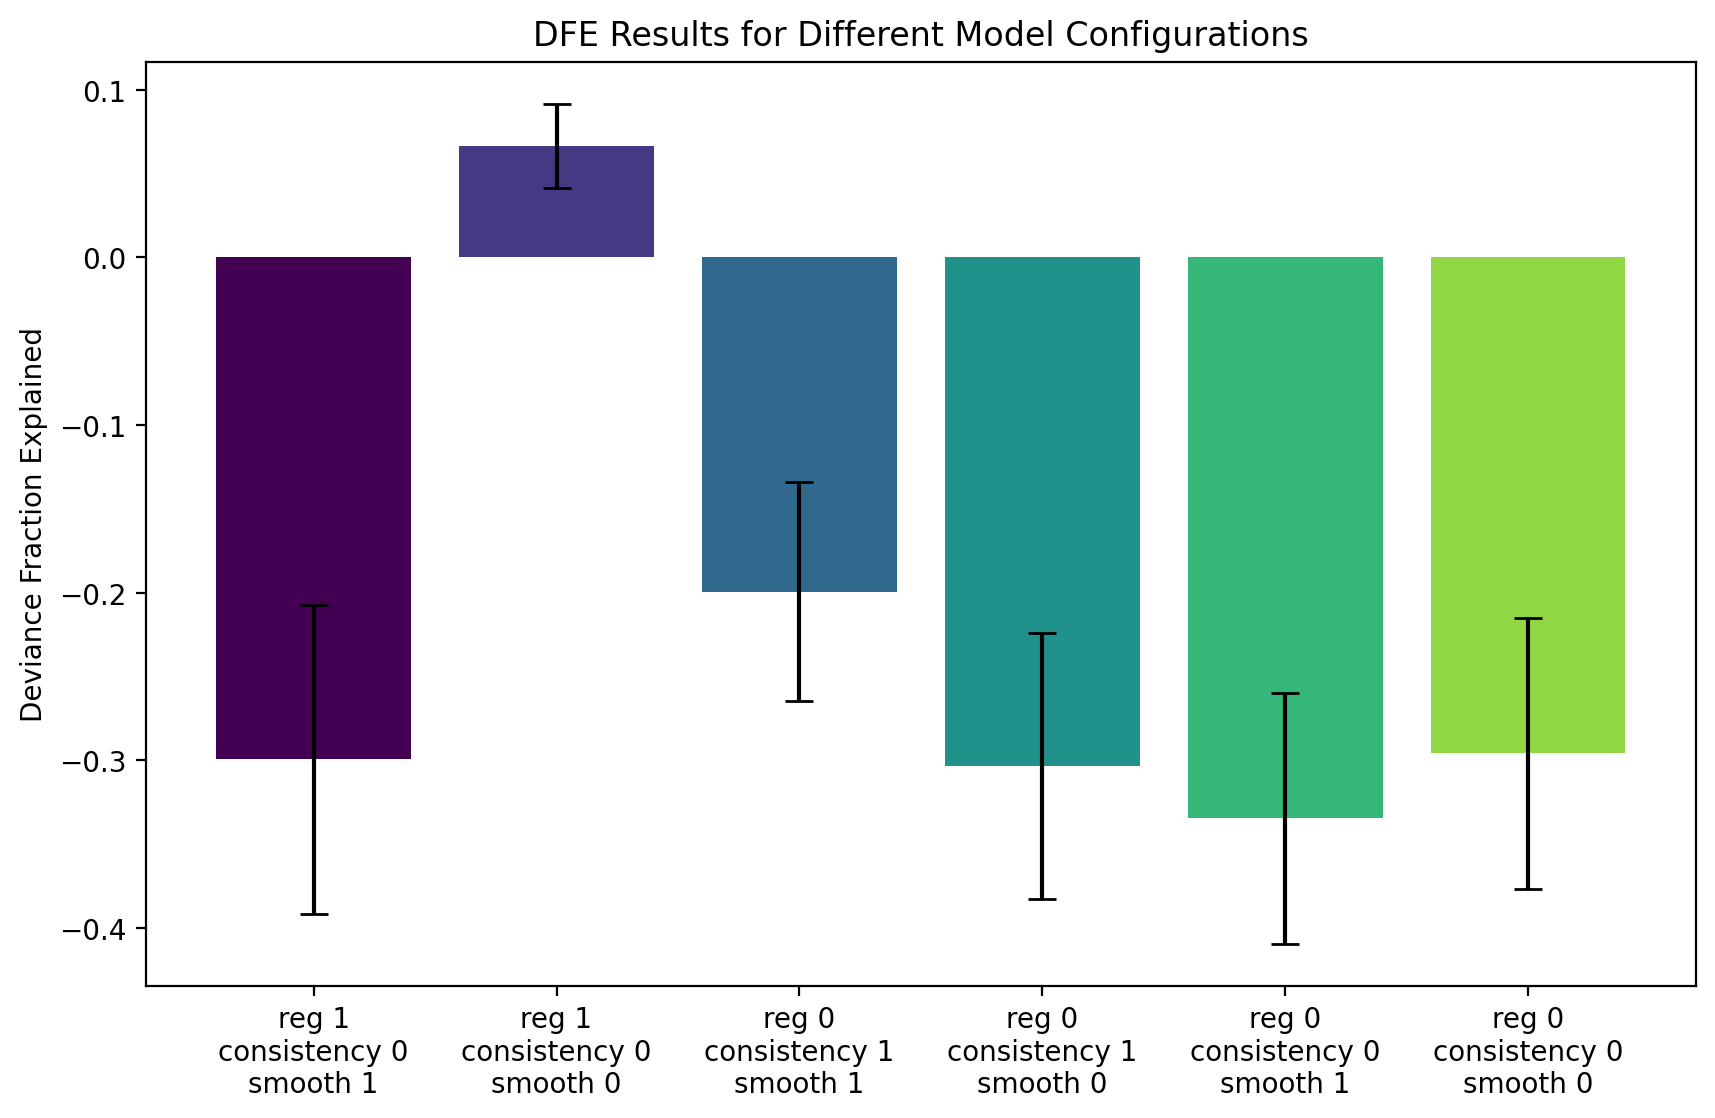

In [57]:
all_means, all_sems, all_xticks = main(filter=False)

plt.figure(figsize=(10, 6))
x = np.arange(len(all_means))
cmap = plt.cm.viridis
colors = [cmap(i / len(all_means)) for i in range(len(all_means))]
plt.bar(x, all_means, yerr=all_sems, capsize=5, color=colors)
plt.xticks(x, all_xticks)
plt.ylabel("Deviance Fraction Explained")
plt.title("DFE Results for Different Model Configurations")
plt.show()